<a href="https://colab.research.google.com/github/ranaharoonkhan/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-make-features/LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

***Feature Engineering ***
As each data frame have multiple columns and they are holding specific type of data to inspect what type of data thy are holding and how we can us the existing columns and make new features from that.


In [0]:
import pandas as pd

In [0]:
#loading Amis Iwoa data set
iowa = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')


In [6]:
# checking sample of 5 rows how data look like
iowa.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
830,831,20,RL,80.0,11900,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1957,1957,Gable,CompShg,HdBoard,HdBoard,BrkFace,387.0,TA,TA,CBlock,TA,TA,No,Rec,1040,Unf,0,352,1392,GasA,...,Y,FuseA,1392,0,0,1392,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1957.0,RFn,2,458,TA,TA,Y,0,0,0,0,192,0,NaN,NaN,NaN,0,6,2008,WD,Normal,166000
263,264,50,RM,50.0,5500,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,7,1929,2001,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,234,ALQ,692,0,926,GasA,...,Y,SBrkr,926,0,390,1316,1,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1974.0,Unf,2,484,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,130000
877,878,60,RL,74.0,8834,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2004,2005,Hip,CompShg,VinylSd,VinylSd,Stone,216.0,Gd,TA,PConc,Ex,TA,No,GLQ,1170,Unf,0,292,1462,GasA,...,Y,SBrkr,1462,762,0,2224,1,0,2,1,4,1,Ex,10,Typ,1,Gd,Attchd,2004.0,Fin,3,738,TA,TA,Y,184,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,350000
752,753,20,RL,79.0,9236,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,6,5,1997,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,PConc,Gd,TA,Gd,GLQ,1200,Unf,0,279,1479,GasA,...,Y,SBrkr,1494,0,0,1494,1,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,1997.0,RFn,2,576,TA,TA,Y,168,27,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,217000
258,259,60,RL,80.0,12435,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,172.0,Gd,TA,PConc,Gd,TA,No,GLQ,361,Unf,0,602,963,GasA,...,Y,SBrkr,963,829,0,1792,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2001.0,RFn,2,564,TA,TA,Y,0,96,0,245,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,231500


In [7]:
#checking shape
iowa.shape

(1460, 81)

In [16]:
#Describing specific columns of data set
iowa[['YearBuilt','MSSubClass']].describe()


,YearBuilt,MSSubClass
count,1460.000000,1460.000000
mean,1971.267808,56.897260
std,30.202904,42.300571
min,1872.000000,20.000000
25%,1954.000000,20.000000
50%,1973.000000,50.000000
75%,2000.000000,70.000000
max,2010.000000,190.000000


In [17]:
#Checking specific columns for thier datatype 
pd.set_option('display.max_rows',100)
iowa.dtypes[:4]

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
dtype: object

In [20]:
#As BedroomAbvGr contains interger values confirming datatype 
iowa['BedroomAbvGr'].dtype

dtype('int64')

In [21]:
#Multiple ways to calling columns 
iowa.Fireplaces.sample(4)

21      1
1261    0
236     0
562     1
Name: Fireplaces, dtype: int64

In [22]:
# this is good practice as we can do multipl columns this way
iowa['Fireplaces'].sample(4)

635     0
556     1
1395    1
1348    1
Name: Fireplaces, dtype: int64

In [23]:
iowa[['Fireplaces','BedroomAbvGr']].sample(4)

,Fireplaces,BedroomAbvGr
368,1,2
143,0,3
218,2,3
876,0,3


Some values are holding float values like LotFrontage column

In [25]:
#Lets examines the first 10 rows of this LotFrontage column
#there os NaN too
iowa['LotFrontage'].head(10)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7     NaN
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

As all the values we can see are having .0 at the end which technically stores them as float we shall check other possible values could be for this column

In [27]:
iowa['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

As it looks most of the values in the column looks an integer values but th most comon value is NaN lets check what is NaN

In [29]:
#for checking Nan importing numpy
import numpy as np
#datatype of Nan
type(np.nan)

float

As in panda try to keep same datatype for colummn we saw above the very comomn values in LotFrontage are nan so dtype float is assigned to whole column where as nan means not recorded data for that specific row in the column or also indcate NA 'Not Applicable' for that partcular row.

In [33]:
#how much missing data 
iowa['LotFrontage'].isnull().sum()

259

In [0]:
#Droping missing data
iowa['LotFrontage'].dropna(inplace=True)

In [35]:
#rechecking null data
iowa['LotFrontage'].isnull().sum()

0

In [38]:
#Sliming down the data set with few columns
small= iowa[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()
small.sample(5)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
105,1053,1053,939,250000
538,1051,1159,0,158000
1403,1485,1464,0,282922
158,991,991,956,254900
227,483,483,504,106000


In [43]:
# Making a new column from existing columns
small['TotalSF']= small['TotalBsmtSF'] + small['1stFlrSF'] + small['2ndFlrSF']
small.head(3)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706


In [44]:
# Making new column PricePSF by dividing
small['PricePerSF'] = small['SalePrice']/small['TotalSF']
small.sample(3)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF,PricePerSF
91,1235,1235,0,98600,2470,39.919028
9,991,1077,0,118000,2068,57.059961
42,840,884,0,144000,1724,83.526682


In [45]:
#Cross tab focusing on catogarical
iowa.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [46]:
# some catagorical columns

iowa[['LotShape', 'Alley', 'Street', 'SaleCondition']].sample(5)

,LotShape,Alley,Street,SaleCondition
308,IR1,NaN,Pave,Normal
205,Reg,NaN,Pave,Normal
497,Reg,Pave,Pave,Normal
1021,Reg,NaN,Pave,Partial
389,Reg,NaN,Pave,Partial


In [50]:
# Vlaue Of sales Condition
iowa['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [52]:
# Creat new catagorical vairable
iowa['NormalCondition']= np.where(iowa['SaleCondition']=='Normal',1,0)
iowa['NormalCondition'].value_counts()

1    1198
0     262
Name: NormalCondition, dtype: int64

In [53]:
# value counts of catagorical variable 
iowa['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [58]:
#maping these four values to 3 values
iowa['LotShape3']= iowa['LotShape'].map({'Reg':'Regular','IR1':'Irregular','IR2':'Others','IR3':'Others'})
iowa['LotShape3'].value_counts()

Regular      925
Irregular    484
Others        51
Name: LotShape3, dtype: int64

In [59]:
#value count of catagorical variable 
iowa['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [61]:
#one more way to map more variables
iowa['Top_neighbor'] ='All Others'
iowa[['Top_neighbor', 'Neighborhood']].head()

,Top_neighbor,Neighborhood
0,All Others,CollgCr
1,All Others,Veenker
2,All Others,CollgCr
3,All Others,Crawfor
4,All Others,NoRidge


In [72]:
#Using i.loc remap the one i want 
iowa.loc[iowa['Neighborhood']=='NAmes', 'Top_neighbor']='North Ames'
iowa[['Top_neighbor', 'Neighborhood']].sample(20)

,Top_neighbor,Neighborhood
1134,All Others,Gilbert
294,North Ames,NAmes
338,All Others,NWAmes
996,North Ames,NAmes
1061,All Others,IDOTRR
1075,All Others,Crawfor
1046,All Others,StoneBr
632,All Others,NWAmes
424,North Ames,NAmes
883,All Others,SWISU


In [73]:
# doing .loc remaping with more requried 
iowa.loc[iowa['Neighborhood']=='CollgCr', 'Top_neighbor']='College Circle'
iowa.loc[iowa['Neighborhood']=='Gilbert', 'Top_neighbor']='Favorite Neighborhood'
iowa.loc[iowa['Neighborhood']=='Somerst', 'Top_neighbor']='Favorite Neighborhood'
iowa[['Top_neighbor', 'Neighborhood']].sample(10)

,Top_neighbor,Neighborhood
1448,All Others,Edwards
681,All Others,SWISU
1410,College Circle,CollgCr
650,Favorite Neighborhood,Somerst
755,Favorite Neighborhood,Somerst
464,College Circle,CollgCr
510,North Ames,NAmes
1219,All Others,BrDale
509,North Ames,NAmes
326,All Others,Veenker


In [74]:
#checking what we have done
iowa['Top_neighbor'].value_counts()

All Others               920
North Ames               225
Favorite Neighborhood    165
College Circle           150
Name: Top_neighbor, dtype: int64

In [79]:
#crosstab
pd.crosstab(iowa['Top_neighbor'],iowa['LotShape3'])


LotShape3,Irregular,Others,Regular
Top_neighbor,,,
All Others,294,23,603
College Circle,53,11,86
Favorite Neighborhood,71,15,79
North Ames,66,2,157


In [80]:
#Marigin
pd.crosstab(iowa['Top_neighbor'],iowa['LotShape3'],margins=True)

LotShape3,Irregular,Others,Regular,All
Top_neighbor,,,,
All Others,294,23,603,920
College Circle,53,11,86,150
Favorite Neighborhood,71,15,79,165
North Ames,66,2,157,225
All,484,51,925,1460


In [81]:
# as percentages 

pd.crosstab(iowa['Top_neighbor'], iowa['LotShape3'], normalize='index', margins=True)
pd.crosstab(iowa['Top_neighbor'], iowa['LotShape3'], normalize='columns', margins=True)

LotShape3,Irregular,Others,Regular,All
Top_neighbor,,,,
All Others,0.607438,0.450980,0.651892,0.630137
College Circle,0.109504,0.215686,0.092973,0.102740
Favorite Neighborhood,0.146694,0.294118,0.085405,0.113014
North Ames,0.136364,0.039216,0.169730,0.154110


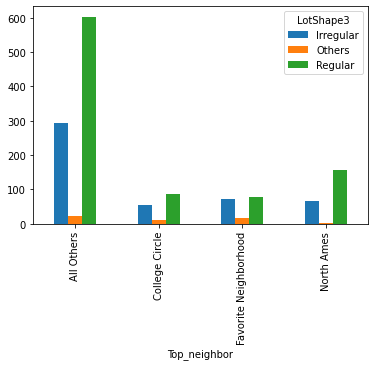

In [82]:
# displaying results

Myresults = pd.crosstab(iowa['Top_neighbor'], iowa['LotShape3'])
Myresults.plot(kind='bar');

In [83]:
#crosstab with other column
pd.crosstab(iowa['OverallQual'], iowa['top_neighbors'])

top_neighbors,College Circle,Favorite Neighborhood,North Ames
OverallQual,,,
3,0,0,3
4,1,1,20
5,28,3,113
6,24,44,74
7,71,77,12
8,23,34,3
9,3,5,0
10,0,1,0


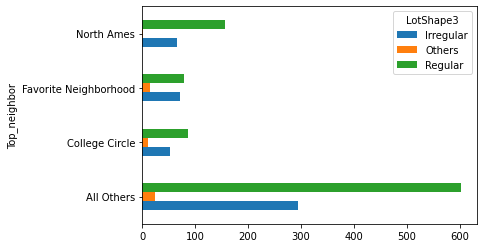

In [85]:
#Fliping chart
Myresults.plot(kind='barh');

***Working with strings with new dataset ***

In [86]:
! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-05-08 23:43:38--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 44.225.46.60, 52.89.126.95, 54.201.144.36
Connecting to resources.lendingclub.com (resources.lendingclub.com)|44.225.46.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [        <=>         ]  22.05M  1.98MB/s    in 13s     

2020-05-08 23:43:51 (1.76 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23121687]



In [87]:
#unziping
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [88]:
#reading the cvs file 
Loan = pd.read_csv('LoanStats_2018Q4.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [90]:
#checking last rows
Loan.tail()

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
NaN                                              NaN 5000  5000  5000   36 months  13.56% 169.83 C   C1  Payoff Clerk         10+ years MORTGAGE 35360.0 Not Verified    Oct-2018 Current n   NaN NaN debt_consolidation Debt consolidation      381xx TN  11.3  1   Jun-2006 0   21.0 NaN 9   0   2597 27.3% 15  f   2751.79 2751.79 3053.17 3053.17 2248.21 804.96  0.0 0.0 0.0 Apr-2020 169.83 May-2020 Apr-2020 0   NaN  1   Individual NaN NaN NaN 0   1413 69785 0   2   0   1   16.0 2379    40.0  3   4   1826 32.0 9500  0   0   1   5   8723   1174.0  60.9 0   0   147.0 85  9   9   2   10.0  21.0 9.0 21.0 0   1   3   2   2   6   6   7   3   9   0.0 0   0   3   92.9 50.0 0   0   93908   4976  3000  6028.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                     10000 10000 9750   36 months  11.06% 327.68 B   B3  NaN                  NaN       RENT     44400.0 Source Verified Oct-2018 Current n   NaN NaN credit_card        Credit card refinancing 980xx WA  11.78 0   Oct-2008 2   40.0 NaN 15  0   6269 13.1% 25  f   5411.74 5276.45 5882.88 5735.81 4588.26 1294.62 0.0 0.0 0.0 Apr-2020 327.68 May-2020 Apr-2020 0   53.0 1   Individual NaN NaN NaN 0   520  16440 3   1   1   1   2.0  10171   100.0 2   5   404  28.0 47700 0   3   5   6   1265.0 20037.0 2.3  0   0   61.0  119 1   1   0   1.0   NaN  1.0 40.0 1   2   4   6   8   3   14  22  4   15  0.0 0   0   3   92.0 0.0  0   0   57871.0 16440 20500 10171.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                                 10000  36 months  16.91% 356.08 C   C5  Key Accounts Manager 2 years   RENT     80000.0 Not Verified    Oct-2018 Current n   NaN NaN other              Other                   021xx MA  17.72 1   Sep-2006 0   14.0 NaN 17  0   1942 30.8% 31  w   5626.39 5626.39 6400.05 6400.05 4373.61 2026.44 0.0 0.0 0.0 Apr-2020 356.08 May-2020 Apr-2020 0   25.0 1   Individual NaN NaN NaN 0   0    59194 0   15  1   1   12.0 57252.0 85.0  0   0   1942 80.0 6300  0   5   0   1   3482   2058.0  48.5 0   0   144.0 142 40  12  0   131.0 30.0 NaN 30.0 3   1   1   1   5   22  2   9   1   17  0.0 0   0   1   74.2 0.0  0   0   73669   59194 4000  67369   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 1: 2050909275 NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN NaN  NaN NaN NaN NaN  NaN   NaN NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN NaN NaN NaN      NaN    NaN      NaN      NaN NaN  NaN NaN        NaN NaN NaN NaN NaN  NaN   NaN NaN NaN NaN NaN  NaN     NaN   NaN NaN NaN  NaN  NaN   NaN NaN NaN NaN NaN    NaN     NaN  NaN NaN NaN   NaN NaN NaN NaN NaN   NaN  NaN NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN NaN NaN     NaN   NaN   NaN     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 2: 820109297  NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN N

In [91]:
#fixing extra Nan rows at th end and begining for dataset
Loans = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2)
Loans.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,...,80.0,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4066.26,4066.26,3222.810000,3222.81,...,0.0,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,...,0.0,0,0,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,0.00,0.00,5848.050000,5848.05,...,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,25780.25,25780.25,13745.470000,13745.47,...,0.0,0,0,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
Loans.shape

(128412, 144)

In [95]:
# sum of null valus in Desending order
pd.set_option('display.max_rows', 143)
Loans.isnull().sum().sort_values(ascending=False)

id                          128412
member_id                   128412
url                         128412
desc                        128412
settlement_percentage       127661
                             ...  
acc_open_past_24mths             0
chargeoff_within_12_mths         0
delinq_amnt                      0
mo_sin_old_rev_tl_op             0
inq_fi                           0
Length: 144, dtype: int64

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01